In [1]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import reduce
import csv
%matplotlib inline
def dir_field_helper(axis,dx, dy, normalise=False, scale_to_axes=True, dynamic_range=None):
    # This helper function rescales the arrows drawn by the quiver plot.
    # normalise=True
    #   enables us to normalise the arrow size (so that they are all the same length)
    #
    # match_axes_scale=True
    #  This applies a transform so that the plotted arrows point along the
    #   phase trajectories correctly
    #  (needed when the x and y scales are different)
    #
    # dyn_range=1.0
    #  this can be adjusted from 0 to 1. This allows us to rescale the arrow lengths
    #  so that arrow length proportional to gradient^dyn_range
    #  - dyn_range=0 is equivalent to normalising the arrows
    #  - dyn_range=1 means arrow length is proportional to gradient
    #  when we have very small and very large arrows setting dyn_range to
    #  a value between 0 and 1 allows us to see small arrows but still retain
    #  some information on their magnitude
    #
    if normalise and dynamic_range!=None:
        print ("Warning cannot use a dynamic range when arrows are normalised...")
        print ("(ignoring dynamic range value)")
    if dynamic_range is None:
        dynamic_range=1.0
    if normalise:
        dynamic_range=0.0
    cur_xlim = axis.get_xlim()
    cur_ylim = axis.get_ylim()
    x_range=cur_xlim[1]-cur_xlim[0]
    y_range=cur_ylim[1]-cur_ylim[0]
    n_rows,n_cols=dx.shape
    for i in range(n_rows):
        for j in range(n_cols):
            x,y=dx[i,j],dy[i,j]
            if scale_to_axes:
                x=x/x_range
                y=y/y_range
            if dynamic_range!=1.0:
                l=(x**2 + y**2)**0.5
                if l!=0:
                    x=x/l**(1.0-dynamic_range)
                    y=y/l**(1.0-dynamic_range)
            dx[i,j],dy[i,j]=x,y
 

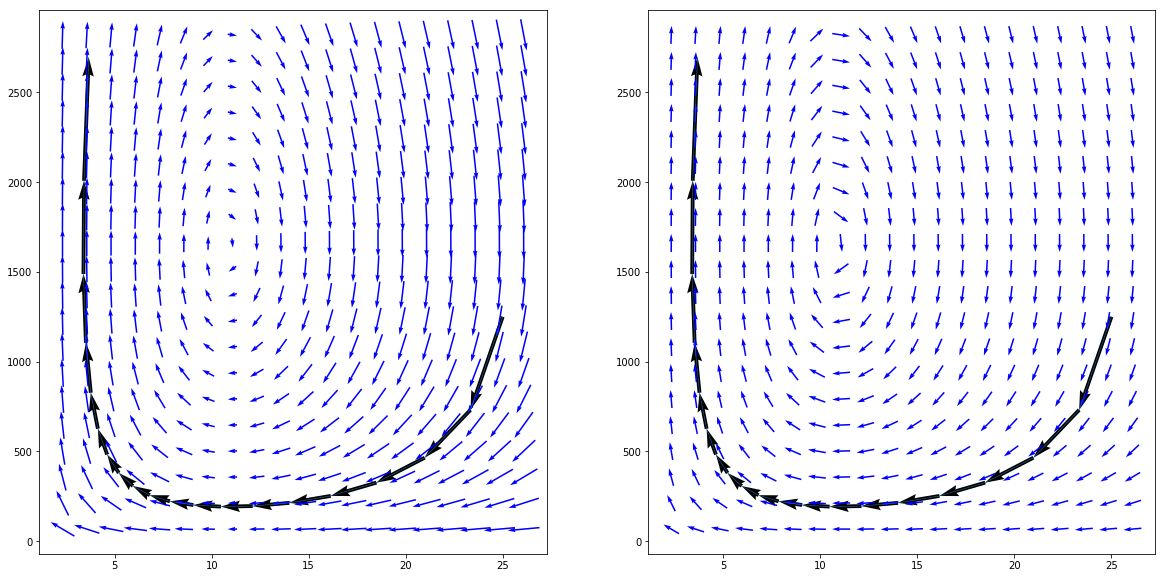

In [2]:
def Ndot(N,t,params):
    N1,N2=N;
    k1,k2,k3,eff=params;
    N1dot=-k3*N1+eff*k2*N1*N2;
    N2dot=k1*N2-k2*N1*N2;
    return (N1dot,N2dot);

N0=(25,1250);
params=(0.87,0.08,0.33,0.0025);
k1,k2,k3,eff=params;
# numstep
t_max=5000.;
t_stepsize=0.5;
t_num=round(t_max/t_stepsize)
ts=np.linspace(0,t_max,t_num);

def nullclines(ax):
    ax.plot([N1f,N1f],list(ax.get_ylim()),'r--',lw=1,label='null_1')
    ax.plot([0,0],list(ax.get_ylim()),'b--',lw=1,label='null_2')
    ax.plot(list(ax.get_xlim()),[N2f,N2f],'b--',lw=1)
    ax.plot(list(ax.get_xlim()),[0,0],'r--',lw=1)
    
# Use np.arange(t_min,t_max,t_step) instead
# def ls(t_min,t_max,t_step):
#     return np.linspace(t_min,t_max,int((t_max-t_min)/t_step))

def vfield(axis,Ndot=Ndot,num=20,scale=1/0.0015,norm_method='none'):
    xlim=list(axis.get_xlim());
    ylim=list(axis.get_ylim());
    x=np.linspace(xlim[0],xlim[1],num);
    y=np.linspace(ylim[0],ylim[1],num);
    xs,ys=np.meshgrid(x,y);
    us,vs=Ndot((xs,ys),0,params);
    
    ls=(us**2+vs**2)**0.5;        
    if norm_method=='log':
        lls=np.min(np.log(ls),0);
        us=us/ls*lls;
        vs=vs/ls*lls;
    elif norm_method=='len':
        ls=(us**2+vs**2)**0.5;
        us=us/ls;
        vs=vs/ls;
    axis.quiver(xs,ys,us,vs,color='b',scale_units='inches',angles='xy',pivot='mid',scale=scale)

plt.close("all");
fig=plt.figure(figsize=[20,10])
ax=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
Ns=odeint(Ndot,N0,np.arange(0,10,0.5),args=(params,))
x=Ns[:,0];
y=Ns[:,1];
ax.plot(x,y,lw=0.5,markersize=0.5)
ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],angles='xy',scale_units='xy',scale=1);
vfield(ax,Ndot,20,5/0.5,'log')
# nullclines(ax)

ax2.plot(x,y,lw=0.5,markersize=0.5)
ax2.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],angles='xy',scale_units='xy',scale=1);
vfield(ax2,Ndot,20,2/0.5,'len')
# nullclines(ax2)



In [ ]:
plt.close("all");
fig=plt.figure()
ax=plt.subplot(1,2,1)
# type(Ns[:,1])
# len(Ns[:,2])
N1f=k1/k2;
N2f=k3/eff/k2;

Ns=odeint(Ndot,N0,ls(0,10,0.5),args=(params,))
x=Ns[:,0];
y=Ns[:,1];
ax.plot(x,y,lw=0.5,markersize=0.5)
ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],angles='xy',scale_units='xy',scale=1);


In [ ]:
# ax.clear()
x=np.arange(-5,5,0.5);
y=np.cos(x);
ax=plt.subplot(1,1,1)
# ax.plot(x,y,lw=1)
ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],angles='xy',scale_units='xy',scale=1);
# x,y=np.mgrid[np.linspace(0,30,100),np.linspace(0,7000,100)];
# y.diff()
# import ipdb;ipdb.set_trace()
# Tracer()
# %debug

ADDING TEXT TO REPORT:
here
ADDING TEXT TO REPORT:
TITLE
ADDING TEXT TO REPORT:
Here we analyse the behavior of Lokta-Volterra Model.
aaa

ADDING FIGURE TO REPORT:
Caption: cattttt


True

In [71]:
from reportlib import *

In [72]:
## OUR ODE MODEL FUNCTION
 
def sdot(s,t,p):
    H,L=s
    k1,k2,k3,eff=p
 
    dH = k1*H - k2*H*L
    dL = eff*k2*H*L - k3*L
 
    dS=(dH,dL)
    return dS
 
H0=100
L0=1
k1=0.7
k2=0.3
k3=0.5
eff=0.02
 
## RUN MODEL
s0=(H0,L0)
p=(k1,k2,k3,eff)
t_max=20
t_obs=np.linspace(0,t_max,1001)
s_obs=odeint(sdot,s0,t_obs,args=(p,))
LV_report=html_report("LV.html")
 
## PUT SOME TEXT INTO OUR REPORT
LV_report.add_heading("The Lotka-Volterra Model")
LV_report.add_subheading("Equations:")
LV_report.add_code("dH/dt = k1 * H        -  k2 * H * L")
LV_report.add_code("dL/dt = eff * k2 . H  -  k3 * L")
 
## CREATE A FIGURE FOR OUR REPORT
 
## BECAUSE FIGURE IS GOING IN REPORT
## WE CREATE IT LIKE THIS:
fig = LV_report.init_figure()
ax=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
ax.set_title('Hare')
ax2.set_title('Lynx')
ax.plot(t_obs, s_obs[:,0], 'b-')
ax2.plot(t_obs, s_obs[:,1], 'g-')
 
## INSERT OUR FIGURE INTO THE REPORT
LV_report.add_subheading('Output of Model')
LV_report.add_text('Parameters: k1,k2,k3,eff=0.7,0.3,0.5,0.02')
LV_report.add_text('Initial conditions: H0,L0=100,1')
LV_report.add_figure(fig)
 
# INSERT SOURCE CODE INTO REPORT
LV_report.add_subheading('Python Code')
LV_report.add_source('LV_report1.py')
 
# WRITE REPORT TO FILE
LV_report.write()
 
# OPEN FILE IN BROWSER
LV_report.view()

ADDING TEXT TO REPORT:
The Lotka-Volterra Model
ADDING TEXT TO REPORT:
Equations:
ADDING TEXT TO REPORT:
dH/dt = k1 * H        -  k2 * H * L
ADDING TEXT TO REPORT:
dL/dt = eff * k2 . H  -  k3 * L
ADDING TEXT TO REPORT:
Output of Model
ADDING TEXT TO REPORT:
Parameters: k1,k2,k3,eff=0.7,0.3,0.5,0.02
ADDING TEXT TO REPORT:
Initial conditions: H0,L0=100,1
ADDING FIGURE TO REPORT:
Caption: 
ADDING TEXT TO REPORT:
Python Code
ADDING CODE TO REPORT:
b'from reportlib import html_report\nimport numpy as np\nfrom matplotlib import pyplot as plt\nfrom scipy.integrate import odeint\nfrom matplotlib.widgets import Slider, Button, RadioButtons\n\n## OUR ODE MODEL FUNCTION\n\ndef sdot(s,t,p):\n    H,L=s\n    k1,k2,k3,eff=p\n\n    dH = k1*H - k2*H*L\n    dL = eff*k2*H*L - k3*L\n\n    dS=(dH,dL)\n    return dS\n\nH0=100\nL0=1\nk1=0.7\nk2=0.3\nk3=0.5\neff=0.02\n\n## RUN MODEL\ns0=(H0,L0)\np=(k1,k2,k3,eff)\nt_max=20\nt_obs=np.linspace(0,t_max,1001)\ns_obs=odeint(sdot,s0,t_obs,args=(p,))\n\nLV_report=htm

['RTLD_LAZY',
 'EX_NOPERM',
 'setuid',
 'WUNTRACED',
 'rmdir',
 'wait4',
 'sysconf',
 'sched_rr_get_interval',
 'WIFSTOPPED',
 '_DummyDirEntry',
 'ST_RELATIME',
 'linesep',
 'environb',
 '_exit',
 'posix_fadvise',
 'readv',
 'truncate',
 'replace',
 'setxattr',
 'execv',
 'EX_PROTOCOL',
 'waitid_result',
 'setresuid',
 'SEEK_CUR',
 'mkdir',
 'O_APPEND',
 'urandom',
 'EX_TEMPFAIL',
 'O_PATH',
 'unlink',
 'NGROUPS_MAX',
 'lseek',
 'symlink',
 'confstr_names',
 'fdopen',
 'EX_USAGE',
 'st',
 'get_blocking',
 'sep',
 'supports_effective_ids',
 'fchdir',
 'WIFCONTINUED',
 'EX_IOERR',
 'XATTR_CREATE',
 'fstat',
 'defpath',
 'WNOHANG',
 'getresuid',
 'major',
 'sched_setaffinity',
 'ST_NOATIME',
 'getcwdb',
 'link',
 'stat_float_times',
 'ttyname',
 'fsync',
 'SCHED_BATCH',
 'getsid',
 'fchown',
 'sched_get_priority_max',
 'O_NOCTTY',
 'fsdecode',
 'POSIX_FADV_WILLNEED',
 'getresgid',
 'supports_follow_symlinks',
 'wait',
 'posix_fallocate',
 'SEEK_END',
 'setpriority',
 'getxattr',
 'listdir

In [ ]:
bs=b'\\x80\\|4ibf\xcc\\/i\x84\xa07\x8a\x9aK\xe9%\x06,\x9d\\2\xa8\x04\xa4\x85j\xf9W\xed w\xe8\x81\xa4H-\x7f\xb4QJ\xbe\xf3`\xaf\x8e\xbb\xc7s\xca9r\xce\xda\xfbG\xdf\xafd\xe7\xac\xfd]\xbf\xb5\xf7\xb7\x8bu\xfa\xe9Z\xeb\xc7\xde\xa9*$Ij\xcd\xbf\x19u\x03\x92$\xfd)\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93N\x1au\x03Ke\xd5\xaaU\xb5f\xcd\x9aQ\xb7!IM\xd9\xb5k\xd7\xaf\xaajb\xd4}\xcc\xc7\xeb6\xc0\xd6\xacY\xc3\xce\x9d;G\xdd\x86$5%\xc9\xbf\x8e\xba\x87\xf9\xf2\x12\xa2$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\xbd\x05X\x92?K\xf2\x93$?M\xf2H\x92\xbf\x9be\xcc\x1b\x93|7\xc9\xbe$\xf7\'Y3\xb4\xee\x9a\xae\xbe7\xc9\xba\xbe\xfa\x96$\x8d\xa7>\'q\xfc\x0e\xf8OU\xf5R\x92\xe5\xc0\x8f\x92\xdcYU\xf7\r\x8d\xf9$\xf0\xeb\xaa\xfawI6\x00\xff\r\xf8\xcfI\xde\x01l\x00\xce\x07\xce\x02\xfeW\x92\x7f_U\xaf\xf4\xd8\xbf$\x8d\xb5m\x0fM\xb3y\xfb^\x9e>t\x98\xb3V\xae`\xd3\xba\xf3\xf8\xc8E\xabG\xdd\xd6\x92\xe9\xed\x0c\xac\x06^\xea\x9e.\xef\x1e5c\xd8\x15\xc07\xba\xe5\x7f\x02\xfe*I\xba\xfaw\xaa\xeawU\xf5K`\x1f\xb0\xb6\x87\xb6%\xa9\t\xdb\x1e\x9a\xe6\x9a\xad{\x98>t\x98\x02\xa6\x0f\x1d\xe6\x9a\xad{\xd8\xf6\xd0\xf4\xa8[[2\xbd\xde\x03K\xb2,\xc9n\xe0\x00\xb0\xa3\xaa\xee\x9f1d5\xf0\x14@U\x1d\x01\x9e\x07\xde2\\\xef\xec\xefj\x92$`\xf3\xf6\xbd\x1c~\xf9\xd8\x8bR\x87_~\x85\xcd\xdb\xf7\x8e\xa8\xa3\xa5\xd7k\x80U\xd5+Uu!p6\xb06\xc9;\x17\xf3\xf5\x93lL\xb23\xc9\xceg\x9f}v1_Z\x92\xc6\xda\xd3\x87\x0e/\xa8\xfez0\x92Y\x88Uu\x08\xb8\x1bX?c\xd54p\x0e@\x92\x93\x807\x03\xcf\r\xd7;gw\xb5\x99\xaf\xbb\xa5\xaa\xa6\xaajjb\xa2\x89\xff\x91\\\x92\x16\xc5Y+W,\xa8\xfez\xd0\xe7,\xc4\x89$+\xbb\xe5\x15\xc0_\x03\x8f\xcf\x18v;pu\xb7\xfc1\xe0_\xaa\xaa\xba\xfa\x86n\x96\xe2\xdb\x81s\x81\x9f\xf4\xd3\xb9$\x8d\xbfM\xeb\xcec\xc5\xf2e\xc7\xd4V,_\xc6\xa6u\xe7\x8d\xa8\xa3\xa5\xd7\xe7,\xc43\x81o$Y\xc6 8\xbfWU\xdfOr=\xb0\xb3\xaan\x07n\x04\xfe1\xc9>\xe0 \x83\x99\x87T\xd5#I\xbe\x07<\n\x1c\x01>\xe3\x0cDI\xfa\x83\xa3\xb3\rO\xa4Y\x88\x19\x9c\xe0\xbc\xfeLMM\x95\x9f\x85(I\x0b\x93dWUM\x8d\xba\x8f\xf9\xf0\x938$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM2\xc0$IM\xea\xe5\x1b\x99\x93\x9c\x03|\x138\x03(`KU\xfd\x8f\x19c6\x01\x1f\x1f\xea\xeb/\x80\x89\xaa:\x98\xe4I\xe0E\xe0\x15\xe0H+_\xb6&IZ:\xbd\x04\x18p\x04\xf8BU=\x98\xe4T`W\x92\x1dU\xf5\xe8\xd1\x01U\xb5\x19\xd8\x0c\x90\xe4\xc3\xc0\x7f\xad\xaa\x83C\xafqiU\xfd\xaa\xa7~%Ic\xae\x97K\x88U\xf5LU=\xd8-\xbf\x08<\x06\xac>\xce&W\x02\xb7\xf4\xd1\x9b$\xa9M\xbd\xdf\x03K\xb2\x06\xb8\x08\xb8\x7f\x8e\xf5o\x02\xd6\x03\xb7\x0e\x95\x0b\xb8+\xc9\xae$\x1b\x97\xbaGI\xd2\xf8\xeb\xeb\x12"\x00INa\x10L\x9f\xaf\xaa\x17\xe6\x18\xf6a\xe0\xc73.\x1f^\\U\xd3I\xde\n\xecH\xf2xU\xdd3\xcb\xebo\x046\x02LNN.r\xf7\x92\xa4q\xd2\xdb\x19X\x92\xe5\x0c\xc2\xeb[U\xb5\xf58C70\xe3\xf2aUMw?\x0f\x00\xb7\x01kg\xdb\xb0\xaa\xb6T\xd5TUMMLL,N\xe3\x92\xa4\xb1\xd4K\x80%\tp#\xf0XU}\xe58\xe3\xde\x0c|\x00\xf8\xe7\xa1\xda\xc9\xdd\xc4\x0f\x92\x9c\x0c\\\x06<\xbc\xb4\x1dK\x92\xc6]_\x97\x10\xdf\x0f\\\x05\xecI\xb2\xbb\xab}\t\x98\x04\xa8\xaa\x1b\xba\xdaG\x81\xbb\xaa\xea7C\xdb\x9e\x01\xdc6\xc8@N\x02\xbe]U?\xe8\xa5kI\xd2\xd8\xea%\xc0\xaa\xeaG@\xe61\xeef\xe0\xe6\x19\xb5\'\x80\x0b\x96\xa41IR\xb3\xfc$\x0eIR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93\x0c0IR\x93z\x0b\xb0$\xe7$\xb9;\xc9\xa3I\x1eI\xf2\xb9Y\xc6\\\x92\xe4\xf9$\xbb\xbb\xc7\xb5C\xeb\xd6\'\xd9\x9bd_\x92/\xf6\xd5\xb7$i<\xf5\xf2\x8d\xcc\x9d#\xc0\x17\xaa\xea\xc1$\xa7\x02\xbb\x92\xec\xa8\xaaGg\x8c\xfbaU}h\xb8\x90d\x19\xf0\xf7\xc0_\x03\xfb\x81\x07\x92\xdc>\xcb\xb6\x92\xa4\x13Dog`U\xf5LU=\xd8-\xbf\x08<\x06\xac\x9e\xe7\xe6k\x81}U\xf5DU\xfd\x1e\xf8\x0ep\xc5\xd2t*Ij\xc1H\xee\x81%Y\x03\\\x04\xdc?\xcb\xea\xf7%\xf9i\x92;\x93\x9c\xdf\xd5V\x03O\r\x8d\xd9\xcf\xfc\xc3O\x92\xf4:\xd4\xe7%D\x00\x92\x9c\x02\xdc\n|\xbe\xaa^\x98\xb1\xfaA\xe0\xcf\xab\xea\xa5$\x97\x03\xdb\x80s\x17\xf0\xda\x1b\x81\x8d\x00\x93\x93\x93\x8b\xd4\xb1$i\x1c\xf5z\x06\x96d9\x83\xf0\xfaVUm\x9d\xb9\xbe\xaa^\xa8\xaa\x97\xba\xe5;\x80\xe5IV\x01\xd3\xc09CC\xcf\xeej3\xb7\xdfRUSU5511\xb1$\x7f\x06I\xd2x\xe8s\x16b\x80\x1b\x81\xc7\xaa\xea+s\x8cy[7\x8e$k\xbb\xfe\x9e\x03\x1e\x00\xceM\xf2\xf6$o\x006\x00\xb7\xf7\xd3\xb9$i\x1c\xf5y\t\xf1\xfd\xc0U\xc0\x9e$\xbb\xbb\xda\x97\x80I\x80\xaa\xba\x01\xf8\x18\xf0\xe9$G\x80\xc3\xc0\x86\xaa*\xe0H\x92\xcf\x02\xdb\x81e\xc0MU\xf5H\x8f\xbdK\x92\xc6L\x06\xf9\xf0\xfa355U;w\xee\x1cu\x1b\x92\xd4\x94$\xbb\xaajj\xd4}\xcc\x87\x9f\xc4!Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&Ij\x92\x01&IjR/\x01\x96\xe4\x9c$w\'y4\xc9#I>7\xcb\x98\x8f\'\xf9Y\x92=I\xeeMr\xc1\xd0\xba\'\xbb\xfa\xee$~K\xa5$\x89\x93zz\x9f#\xc0\x17\xaa\xea\xc1$\xa7\x02\xbb\x92\xec\xa8\xaaG\x87\xc6\xfc\x12\xf8@U\xfd:\xc9\x07\x81-\xc0{\x86\xd6_ZU\xbf\xea\xa9_I\xd2\x98\xeb%\xc0\xaa\xea\x19\xe0\x99n\xf9\xc5$\x8f\x01\xab\x81G\x87\xc6\xdc;\xb4\xc9}\xc0\xd9}\xf4&IjS\xef\xf7\xc0\x92\xac\x01.\x02\xee?\xce\xb0O\x02w\x0e=/\xe0\xae$\xbb\x92l\\\xba\xee$I\xad\xe8\xeb\x12"\x00IN\x01n\x05>_U/\xcc1\xe6R\x06\x01v\xf1P\xf9\xe2\xaa\x9aN\xf2V`G\x92\xc7\xab\xea\x9eY\xb6\xdd\x08l\x04\x98\x9c\x9c\\\xf4\xfe%I\xe3\xa3\xb73\xb0$\xcb\x19\x84\xd7\xb7\xaaj\xeb\x1cc\xde\x05|\x1d\xb8\xa2\xaa\x9e;Z\xaf\xaa\xe9\xee\xe7\x01\xe06`\xedl\xdbW\xd5\x96\xaa\x9a\xaa\xaa\xa9\x89\x89\x89\xc5\xfe#H\x92\xc6H_\xb3\x10\x03\xdc\x08T?\xb9\x9b\xf8A\x92\x93\x81\xcb\x80\x87\x97\xbekI\xd28\xeb\xeb\x12\xe2\xfb\x81\xab\x80=Ivw\xb5/\x01\x93\x00Uu\x03p-\xf0\x16\xe0k\x83\xbc\xe3HUM\x01g\x00\xb7u\xb5\x93\x80oW\xd5\x0fz\xea[\x924\xa6\xfa\x9a\x85\xf8# \xaf2\xe6S\xc0\xa7f\xa9?\x01\\\xf0\xc7[H\x92Nd~\x12\x87$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\x06\x98$\xa9I\xbd\x05X\x92s\x92\xdc\x9d\xe4\xd1$\x8f$\xf9\xdc,c\x92\xe4\xabI\xf6%\xf9Y\x92w\x0f\xad\xbb:\xc9/\xba\xc7\xd5}\xf5-I\x1aO}}#3\xc0\x11\xe0\x0bU\xf5`\x92S\x81]IvT\xd5\xa3Cc>\x08\x9c\xdb=\xde\x03\xfc\x03\xf0\x9e$\xa7\x03\xd7\x01S@u\xdb\xde^U\xbf\xee\xb1\x7f\xe95\xd9\xf6\xd04\x9b\xb7\xef\xe5\xe9C\x879k\xe5\n6\xad;\x8f\x8f\\\xb4z\xd4mI\xcd\xea\xed\x0c\xac\xaa\x9e\xa9\xaa\x07\xbb\xe5\x17\x81\xc7\x80\x99\xbf\xbdW\x00\xdf\xac\x81\xfb\x80\x95I\xce\x04\xd6\x01;\xaa\xea`\x17Z;\x80\xf5}\xf5.\xbdV\xdb\x1e\x9a\xe6\x9a\xad{\x98>t\x98\x02\xa6\x0f\x1d\xe6\x9a\xad{\xd8\xf6\xd0\xf4\xa8[\x93\x9a5\x92{`I\xd6\x00\x17\x01\xf7\xcfX\xb5\x1axj\xe8\xf9\xfe\xae6W]j\xc2\xe6\xed{9\xfc\xf2+\xc7\xd4\x0e\xbf\xfc\n\x9b\xb7\xef\x1dQGR\xfbz\x0f\xb0$\xa7\x00\xb7\x02\x9f\xaf\xaa\x17\x16\xf9\xb57&\xd9\x99d\xe7\xb3\xcf>\xbb\x98/-\xbd&O\x1f:\xbc\xa0\xba\xa4W\xd7k\x80%Y\xce \xbc\xbeUU[g\x192\r\x9c3\xf4\xfc\xec\xae6W\xfd\x18U\xb5\xa5\xaa\xa6\xaajjbbb\xf1\x1a\x97^\xa3\xb3V\xaeXP]\xd2\xab\xebs\x16b\x80\x1b\x81\xc7\xaa\xea+s\x0c\xbb\x1d\xf8\xdbn6\xe2{\x81\xe7\xab\xea\x19`;pY\x92\xd3\x92\x9c\x06\\\xd6\xd5\xa4&lZw\x1e+\x96/;\xa6\xb6b\xf926\xad;oD\x1dI\xed\xebs\x16\xe2\xfb\x81\xab\x80=Ivw\xb5/\x01\x93\x00Uu\x03p\x07p9\xb0\x0f\xf8-\xf0\x89n\xdd\xc1$_\x06\x1e\xe8\xb6\xbb\xbe\xaa\x0e\xf6\xd8\xbb\xf4\x9a'


type(bs)
bs.decode('ascii')
import codecs
# codecs.decode(bs)

In [ ]:
    def add_figure(self,fig,caption="",verbose=True):
        canvas=FigureCanvas(fig)
#         png_output = io.StringIO()
        
#         %debug
        png_output = io.BytesIO()
#         print(png_output)
        canvas.print_png(png_output)
#         png_output = png_output.getvalue().encode("base64").replace('\n','')
        canvas.print_png(png_output)
        self.html_items.append(html_report.fig_template.format(imgdata=png_output,caption=caption))
        if not verbose:
            return
        print("ADDING FIGURE TO REPORT:")
        print("Caption:",caption)


In [ ]:
import io,sys
out = io.StringIO()

iobkp=sys.stdout;
sys.stdout = out
print( "hi, I'm going out")

# import pdb; 
sys.stdout = iobkp;


print(out.getvalue())

# pdb.set_trace()

# print a

# print( "hi, I'm going out")
# sys
# print(sys.__stdout__)

In [ ]:

# import sys
sys.stdout
# print(out.__dir__())

In [ ]:
# dn1,dn2=Ndot((a,b),0,params);
# ax.arrow(a,b,1,1*dn2/dn1,shape='full', lw=2, length_includes_head=True, head_width=.05,head_length=1)
nullclines(ax)
ax.legend(loc=1);
ax.plot(0,0,'yo')
ax.plot(0,0,'yo')
# help(ax.legend)
# ax.legend()
Nsf=odeint(Ndot,(N1f+0.5,N2f+0.5),ts,args=(params,))
ax2=plt.subplot(1,2,2)
ax2.plot(Nsf[:,0],Nsf[:,1])
ax2.set_xlim([N1f-1,N1f+1])
ax2.set_ylim([N2f-500,N2f+500])
nullclines(ax2)
ax2.legend(loc=1)
vfield(ax2,Ndot,20,1/0.0015);

# fig2=plt.figure(2)
# ax21=plt.subplot(1,1,1);


In [9]:
import csv
csvfile='Fur_Pelts_1900_to_1920.csv';
with open(csvfile,'rt') as f:
    reader=csv.reader(f);
    headers=next(reader,None)
    column={};
    for h in headers:
            column[h]=[]
    for row in reader:
            for h,v in zip(headers,row):
                column[h].append(v);

xs=column['Hare'];
ys=column['Lynx'];
ts=
    



{'Hare': ['30000',
  '47200',
  '70200',
  '77400',
  '36300',
  '20600',
  '18100',
  '21400',
  '22000',
  '25400',
  '27100',
  '40300',
  '57000',
  '76600',
  '52300',
  '19500',
  '11200',
  '7600',
  '14600',
  '16200',
  '24700'],
 'Lynx': ['4000',
  '6100',
  '9800',
  '35200',
  '59400',
  '41700',
  '19000',
  '13000',
  '8300',
  '9100',
  '7400',
  '8000',
  '12300',
  '19500',
  '45700',
  '51100',
  '29700',
  '15800',
  '9700',
  '10100',
  '8600'],
 'Year': ['1900',
  '1901',
  '1902',
  '1903',
  '1904',
  '1905',
  '1906',
  '1907',
  '1908',
  '1909',
  '1910',
  '1911',
  '1912',
  '1913',
  '1914',
  '1915',
  '1916',
  '1917',
  '1918',
  '1919',
  '1920']}

In [7]:
print(0.0000258*0.89)
print(0.08*0.0025)


2.2962e-05
0.0002
